In [1]:
import numpy as np
import pandas as pd
import pycaret
from pycaret.classification import *

In [3]:
df= pd.read_csv("masterDailyRecapAll.csv")

In [128]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Bet State Chosen,Kelly Criterion Suggestion,Payouts (per Dollar),League,Date,Success,Allocation Dollars,Allocation Percentage
0,65,0.0,Aston Villa,0.08,4.90,EPL,2021-01-01,0.0,0.284478,0.001855
1,66,0.0,Pistons,0.08,4.00,NBA,2021-01-01,1.0,0.284478,0.001855
2,67,1.0,Hornets,0.26,1.96,NBA,2021-01-01,0.0,3.004796,0.019594
3,68,2.0,Mavericks,0.49,1.57,NBA,2021-01-01,1.0,10.672359,0.069594
4,69,3.0,Hawks,0.15,3.00,NBA,2021-01-01,1.0,1.000117,0.006522


In [129]:
"""
le = preprocessing.LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df

dummies = pd.get_dummies(df.League)
dummies
df_league = pd.concat([df, dummies], axis=1)
df_league
df_league.columns
"""

"\nle = preprocessing.LabelEncoder()\ndf['League'] = le.fit_transform(df['League'])\ndf\n\ndummies = pd.get_dummies(df.League)\ndummies\ndf_league = pd.concat([df, dummies], axis=1)\ndf_league\ndf_league.columns\n"

In [130]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Date','Bet State Chosen'],inplace = True)
df

,Kelly Criterion Suggestion,Payouts (per Dollar),League,Success,Allocation Dollars,Allocation Percentage
0,0.08,4.90,EPL,0.0,0.284478,0.001855
1,0.08,4.00,NBA,1.0,0.284478,0.001855
2,0.26,1.96,NBA,0.0,3.004796,0.019594
3,0.49,1.57,NBA,1.0,10.672359,0.069594
4,0.15,3.00,NBA,1.0,1.000117,0.006522
...,...,...,...,...,...,...
412,0.18,2.46,NBA,0.0,2.079000,0.006000
413,0.24,2.98,NBA,0.0,3.696000,0.010000
414,0.72,1.18,NBA,1.0,33.265000,0.094000
415,0.26,2.35,TSL,0.0,4.338000,0.012000


In [39]:
#df['League'].value_counts()
setup()

In [131]:


"""
classification_setup = setup(data=df,target='Success',categorical_features = ['League'], high_cardinality_features=['Bet State Chosen'] )

"""

classification_setup = setup(data= df, target='Success', train_size = 0.5, categorical_features = ['League'],remove_outliers=True,normalize=True, remove_multicollinearity=True ,normalize_method='robust',feature_selection=True ,silent = True)

,Description,Value
0,session_id,7063
1,Target,Success
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(417, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [132]:
compare_models(sort = 'AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6405,0.6669,0.4768,0.5709,0.5036,0.2292,0.2419,1.6420
lr,Logistic Regression,0.6187,0.6497,0.4000,0.5950,0.4573,0.1754,0.1965,0.4420
rf,Random Forest Classifier,0.6205,0.6471,0.4518,0.5399,0.4806,0.1878,0.1953,0.1020
ada,Ada Boost Classifier,0.6337,0.6427,0.4982,0.5557,0.5145,0.2236,0.2315,0.0210
lightgbm,Light Gradient Boosting Machine,0.6305,0.6371,0.5179,0.5540,0.5237,0.2269,0.2310,0.0330
lda,Linear Discriminant Analysis,0.6095,0.6352,0.3893,0.5333,0.4427,0.1528,0.1606,0.0060
et,Extra Trees Classifier,0.5897,0.6216,0.4643,0.4577,0.4531,0.1301,0.1324,0.1000
gbc,Gradient Boosting Classifier,0.5937,0.6125,0.4625,0.5152,0.4762,0.1477,0.1544,0.0160
nb,Naive Bayes,0.4463,0.6092,0.9375,0.4129,0.5723,0.0507,0.0984,0.0070
knn,K Neighbors Classifier,0.6147,0.5892,0.4143,0.5178,0.4521,0.1641,0.1702,0.2310


In [133]:
best_auc_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5500,0.5938,0.3750,0.4286,0.4000,0.0426,0.0428
1,0.7000,0.6458,0.5000,0.6667,0.5714,0.3478,0.3563
2,0.6500,0.7812,0.3750,0.6000,0.4615,0.2222,0.2357
3,0.6500,0.7500,0.8750,0.5385,0.6667,0.3396,0.3852
4,0.5000,0.4792,0.3750,0.3750,0.3750,-0.0417,-0.0417
5,0.6500,0.7292,0.2500,0.6667,0.3636,0.1860,0.2287
6,0.6000,0.5938,0.3750,0.5000,0.4286,0.1304,0.1336
7,0.8421,0.8095,0.7143,0.8333,0.7692,0.6503,0.6548
8,0.6842,0.8095,0.4286,0.6000,0.5000,0.2785,0.2869
9,0.5789,0.4773,0.5000,0.5000,0.5000,0.1364,0.1364


In [134]:
tuned = tune_model(best_auc_model,optimize = 'AUC',n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.6615,0.3750,0.5000,0.4286,0.1304,0.1336
1,0.7000,0.7917,0.2500,1.0000,0.4000,0.2857,0.4082
2,0.6000,0.8438,0.1250,0.5000,0.2000,0.0476,0.0680
3,0.7500,0.8438,1.0000,0.6154,0.7619,0.5283,0.5991
4,0.5000,0.5000,0.5000,0.4000,0.4444,0.0000,0.0000
5,0.6500,0.8125,0.3750,0.6000,0.4615,0.2222,0.2357
6,0.7000,0.7500,0.3750,0.7500,0.5000,0.3182,0.3572
7,0.7368,0.7679,0.7143,0.6250,0.6667,0.4509,0.4536
8,0.8421,0.8512,0.7143,0.8333,0.7692,0.6503,0.6548
9,0.4737,0.4489,0.3750,0.3750,0.3750,-0.0795,-0.0795


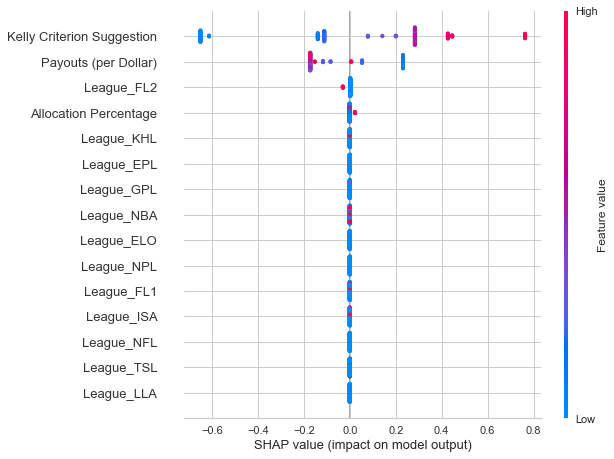

In [135]:
interpret_model(tuned)

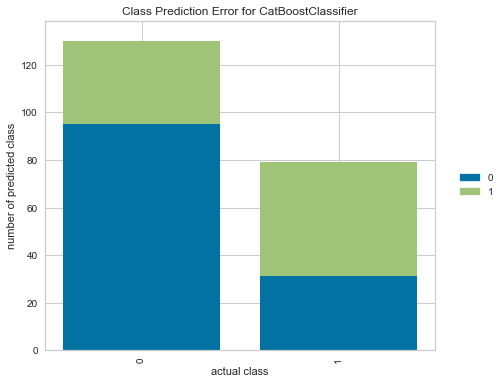

In [136]:
plot_model(tuned,'error')

In [137]:
interpret_model(tuned, plot = 'reason', observation = 10)

In [140]:
predictions = predict_model(tuned, data = df)

In [141]:
predictions

,Kelly Criterion Suggestion,Payouts (per Dollar),League,Success,Allocation Dollars,Allocation Percentage,Label,Score
0,0.08,4.90,EPL,0.0,0.284478,0.001855,0.0,0.7767
1,0.08,4.00,NBA,1.0,0.284478,0.001855,0.0,0.7767
2,0.26,1.96,NBA,0.0,3.004796,0.019594,1.0,0.5020
3,0.49,1.57,NBA,1.0,10.672359,0.069594,1.0,0.5228
4,0.15,3.00,NBA,1.0,1.000117,0.006522,0.0,0.6760
...,...,...,...,...,...,...,...,...
412,0.18,2.46,NBA,0.0,2.079000,0.006000,0.0,0.6182
413,0.24,2.98,NBA,0.0,3.696000,0.010000,0.0,0.6266
414,0.72,1.18,NBA,1.0,33.265000,0.094000,1.0,0.6444
415,0.26,2.35,TSL,0.0,4.338000,0.012000,0.0,0.5424


In [142]:
predictions['Label'] = pd.to_numeric(predictions['Label'])
bets = predictions[predictions['Label'] == 1] 
bets
#bets.dtypes

,Kelly Criterion Suggestion,Payouts (per Dollar),League,Success,Allocation Dollars,Allocation Percentage,Label,Score
2,0.26,1.96,NBA,0.0,3.004796,0.019594,1.0,0.5020
3,0.49,1.57,NBA,1.0,10.672359,0.069594,1.0,0.5228
5,0.82,1.86,NBA,1.0,29.887938,0.194899,1.0,0.6444
9,0.56,2.42,NBA,0.0,13.939407,0.090899,1.0,0.5200
11,0.30,2.15,ELO,1.0,3.168324,0.015203,1.0,0.5228
...,...,...,...,...,...,...,...,...
409,0.41,1.98,NBA,1.0,10.787000,0.031000,1.0,0.5228
410,0.61,1.40,NBA,1.0,23.877000,0.068000,1.0,0.5584
411,0.48,1.57,NBA,0.0,14.784000,0.042000,1.0,0.5228
414,0.72,1.18,NBA,1.0,33.265000,0.094000,1.0,0.6444


In [143]:
bets['Success'].value_counts()

1.0    94
0.0    57
Name: Success, dtype: int64

In [144]:
for i in df['League'].unique():
    print(i)
    betsleague = df[df['League'] == i]
    print(betsleague['Success'].value_counts(0))
    print('Success Rate = ', )

EPL
0.0    17
1.0     7
Name: Success, dtype: int64
Success Rate = 
NBA
1.0    68
0.0    60
Name: Success, dtype: int64
Success Rate = 
ELO
0.0    23
1.0    12
Name: Success, dtype: int64
Success Rate = 
GPL
0.0    17
1.0     6
Name: Success, dtype: int64
Success Rate = 
KHL
0.0    29
1.0    20
Name: Success, dtype: int64
Success Rate = 
NFL
0.0    11
1.0    11
Name: Success, dtype: int64
Success Rate = 
FL2
0.0    20
1.0     6
Name: Success, dtype: int64
Success Rate = 
FL1
0.0    16
1.0     5
Name: Success, dtype: int64
Success Rate = 
ISA
0.0    16
1.0     9
Name: Success, dtype: int64
Success Rate = 
LLA
0.0    12
1.0     5
Name: Success, dtype: int64
Success Rate = 
TSL
0.0    12
1.0    12
Name: Success, dtype: int64
Success Rate = 
NPL
0.0    12
1.0     1
Name: Success, dtype: int64
Success Rate = 
PPL
0.0    3
1.0    3
Name: Success, dtype: int64
Success Rate = 
BPL
0.0    2
1.0    2
Name: Success, dtype: int64
Success Rate = 


In [146]:
for i in bets['League'].unique():
    print(i)
    betsleague = bets[bets['League'] == i]
    print(betsleague['Success'].value_counts())

NBA
1.0    46
0.0    26
Name: Success, dtype: int64
ELO
1.0    7
0.0    5
Name: Success, dtype: int64
EPL
1.0    3
0.0    1
Name: Success, dtype: int64
GPL
0.0    1
Name: Success, dtype: int64
KHL
0.0    12
1.0    11
Name: Success, dtype: int64
NFL
1.0    8
0.0    2
Name: Success, dtype: int64
FL2
1.0    3
0.0    2
Name: Success, dtype: int64
FL1
1.0    3
0.0    2
Name: Success, dtype: int64
LLA
1.0    3
0.0    2
Name: Success, dtype: int64
TSL
1.0    6
0.0    2
Name: Success, dtype: int64
ISA
1.0    2
Name: Success, dtype: int64
NPL
0.0    1
1.0    1
Name: Success, dtype: int64
PPL
0.0    1
Name: Success, dtype: int64
BPL
1.0    1
Name: Success, dtype: int64
